# PS 88 Project Part 2: Replication (Sheve and Stasavage)
**General instructions:** these replications will be similar to labs, though with a bit less guidance than we would typicallt give. An advantage you have is that the answer you are supposed to get for most questions is in the paper.

When we say to "replicate" a table we don't mean you need to reproduce every bit of formatting. Typically for regressions we just want you to verify that the coefficients match those reported in the table. For graphs, the output should look pretty similar, though again you don't need to make the formatting look exactly the same. 


On to the paper! In this notebook we will be exploring the replication data from *The Conscription of Wealth: Mass Warfare and the Demand for Progressive Taxation* by Kenneth Scheve and David Stasavage. The original paper is linked [here](https://isps.yale.edu/sites/default/files/publication/2012/12/ISPS10-042.pdf). The data repository for this project is linked [here](https://isps.yale.edu/research/data/d062). This paper looks at how tax rates rose after World War I.


Let's start by importing the packages we'll be using in this notebook:

In [9]:
# Run this cell to import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()
pd.set_option('display.max_columns', None)

Next, run the cell below to read in the data we will be using:

In [10]:
data_string = "data/Scheve_Stasavage_IO_2010_CoWreplicationdata.csv"
ss = pd.read_csv(data_string)
ss

,country,ccode,year,enfranchised1,enfranchised2,enfrachisement3,inctaxshrn,hifatwaryear,wwi_iihighmob2,decadec,munsuff,topratep,himobpopyearp,himobpopyear2p,leftseatshp,gdppcp,ratiop,topratepl1,wwihighmobaft,year3,topdum,topratenoint,topratenointl1,_Idecadec_9,_Idecadec_10,_Idecadec_11,_Idecadec_12,_Idecadec_13,_Idecadec_14,_Idecadec_15,_Idecadec_16,_Idecadec_17,_Idecadec_18,_Idecadec_19,_Idecadec_20,_Idecadec_21,_Idecadec_22,_Idecadec_23,_Iccode_20,_Iccode_200,_Iccode_210,_Iccode_220,_Iccode_230,_Iccode_380,_Iccode_740
0,USA,2,1850,NaN,44.200001,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.830661,0.017015,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,USA,2,1851,NaN,44.200001,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.867650,0.019820,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,USA,2,1852,NaN,44.900002,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.904639,0.017458,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,USA,2,1853,NaN,44.900002,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.941628,0.018436,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,USA,2,1854,NaN,44.900002,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.978617,0.020414,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,Japan,740,2001,NaN,NaN,NaN,NaN,0,0,23,1,37.0,0.0,0.0,NaN,21.090689,NaN,37.0,0,NaN,1.0,37.0,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1244,Japan,740,2002,NaN,NaN,NaN,NaN,0,0,23,1,37.0,NaN,NaN,NaN,NaN,NaN,37.0,0,NaN,1.0,37.0,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1245,Japan,740,2003,NaN,NaN,NaN,NaN,0,0,23,1,37.0,NaN,NaN,NaN,NaN,NaN,37.0,0,NaN,1.0,37.0,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1246,Japan,740,2004,NaN,NaN,NaN,NaN,0,0,23,1,37.0,NaN,NaN,NaN,NaN,NaN,37.0,0,NaN,1.0,37.0,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


A nice way to explore a data frame is with the `.info()` function, which tells how many rows/columns there are, and the names of the columns.

In [3]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          1248 non-null   object 
 1   ccode            1248 non-null   int64  
 2   year             1248 non-null   int64  
 3   enfranchised1    476 non-null    float64
 4   enfranchised2    150 non-null    float64
 5   enfrachisement3  139 non-null    float64
 6   inctaxshrn       248 non-null    float64
 7   hifatwaryear     1248 non-null   int64  
 8   wwi_iihighmob2   1248 non-null   int64  
 9   decadec          1248 non-null   int64  
 10  munsuff          1248 non-null   int64  
 11  topratep         1183 non-null   float64
 12  himobpopyearp    1136 non-null   float64
 13  himobpopyear2p   1136 non-null   float64
 14  leftseatshp      1049 non-null   float64
 15  gdppcp           1126 non-null   float64
 16  ratiop           959 non-null    float64
 17  topratepl1    

This data frame is in "country-year" format, meaning each entry corresponds to one year in one country (E.g., France in 1958).

To get a better sense of the data, let's explore some individual variables. We can use the `.value_counts()` function on the `year` variable to see how many data points there are for each year:

In [11]:
ss['year'].value_counts()

1850    8
1957    8
1950    8
1951    8
1952    8
       ..
1902    8
1903    8
1904    8
1905    8
2005    8
Name: year, Length: 156, dtype: int64

So there are 8 observations for the years which we can display. Another way to check this is by first turning the `value_counts()` output into a dataframe with the year and count as variables (don't sweat the details here):

In [12]:
yrcount = ss['year'].value_counts().rename_axis("Year").reset_index(name="count")
yrcount

,Year,count
0,1850,8
1,1957,8
2,1950,8
3,1951,8
4,1952,8
...,...,...
151,1902,8
152,1903,8
153,1904,8
154,1905,8


Now we can do a lineplot to see how many observations there are per year.

<AxesSubplot:xlabel='Year', ylabel='count'>

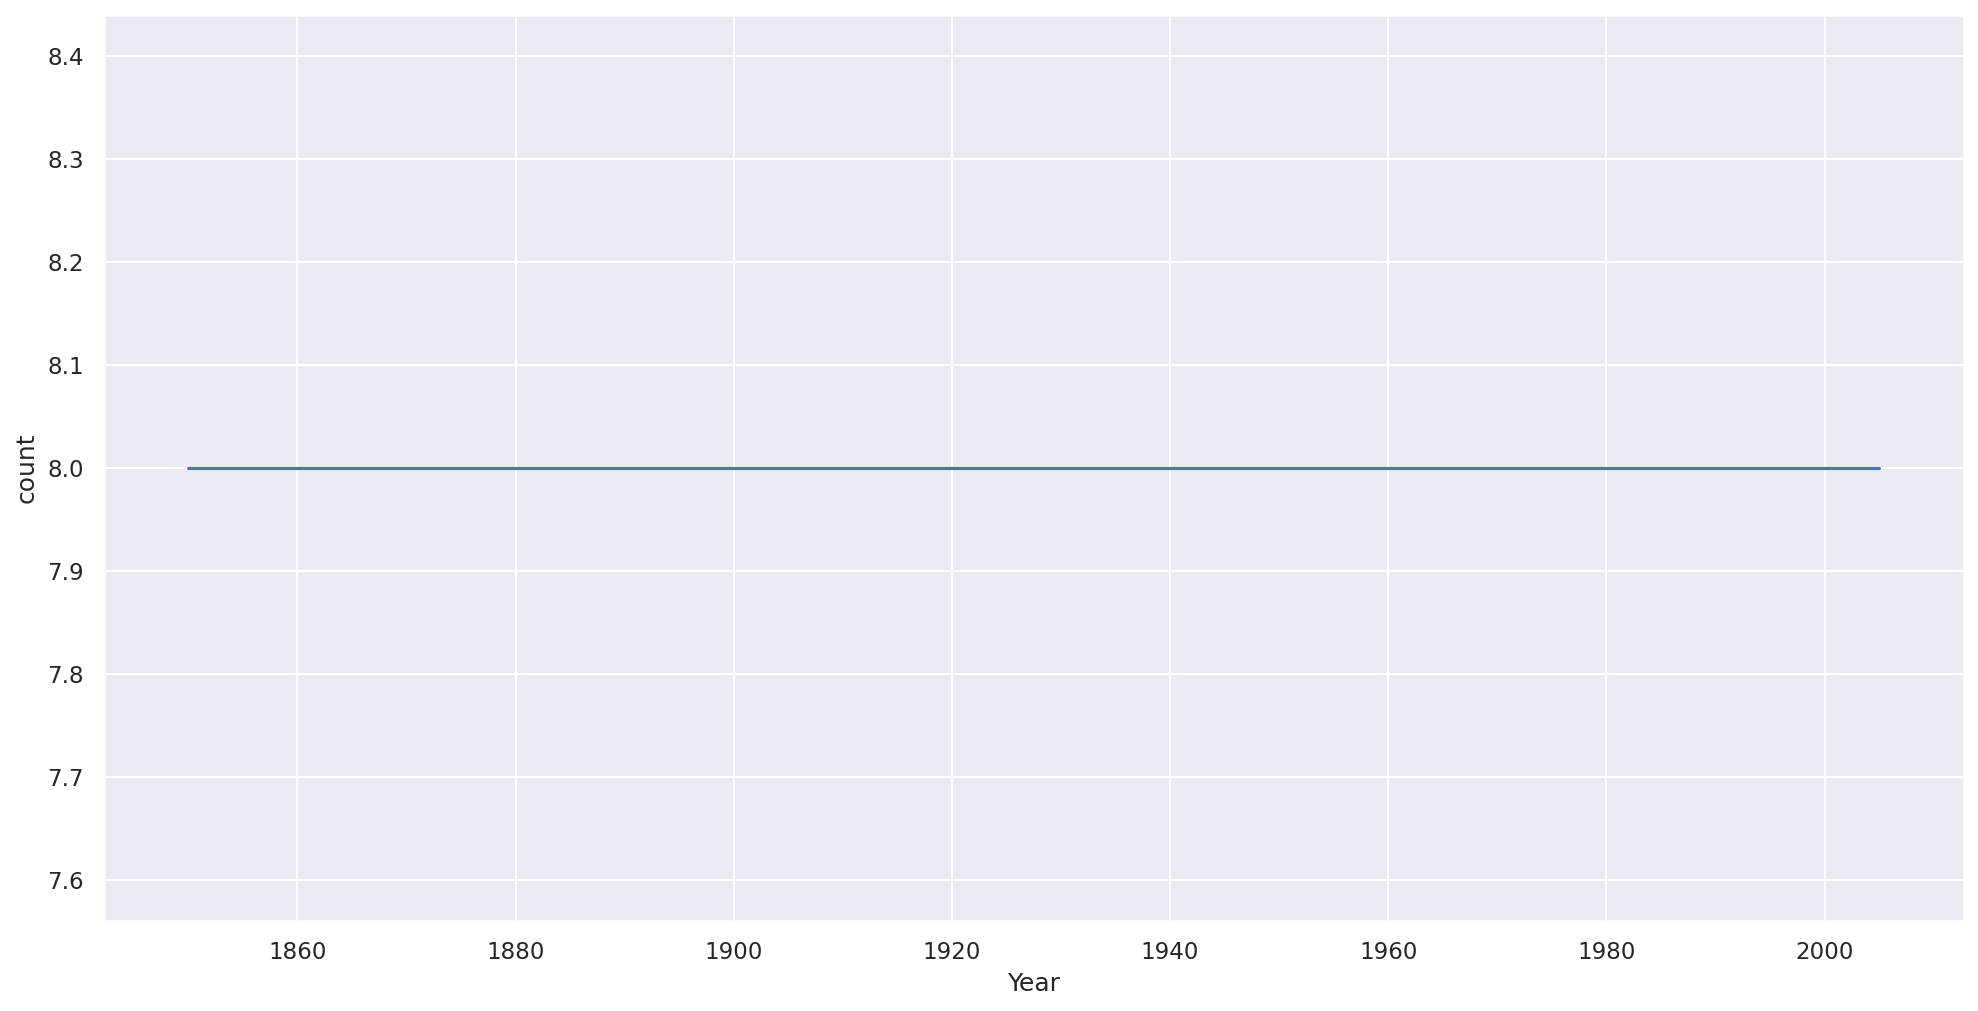

In [13]:
sns.lineplot(x=yrcount['Year'], y=yrcount['count'])

So we do have 8 countries for each year in the data frame.

**Question 1.1. Use the `.value_counts()` function on the `country` variable to see what countries are in the data frame and how many years of data there are for each.**

Our key dependent variable is the tax rate on the highest earners, called `topratep`. 

**Question 1.2. Make a histogram of `topratep`.**

A key independent variable will be an indicator for whether the country is one that participated in WWI, and the year is after mobilization for the war. This variable is called `wwihighmobaft`. Let's plot this as a function of year.

<AxesSubplot:xlabel='year', ylabel='wwihighmobaft'>

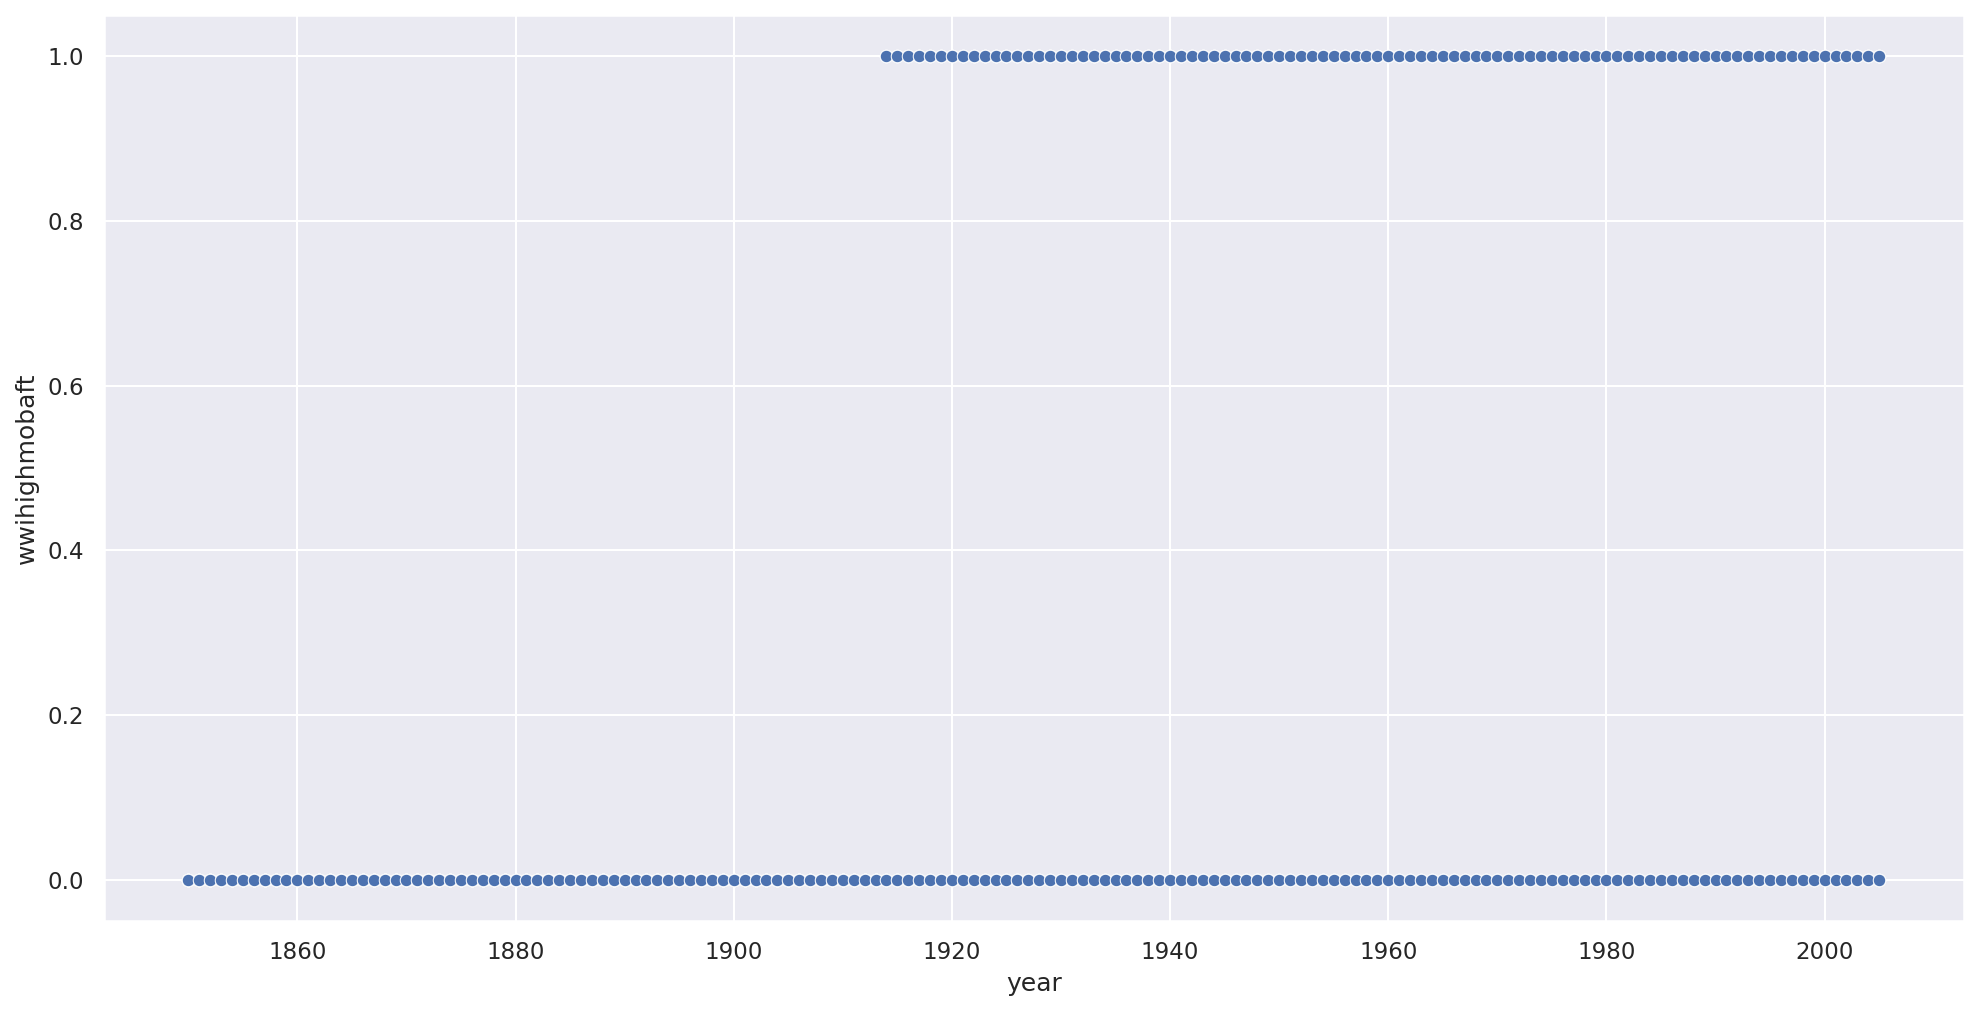

In [7]:
sns.scatterplot(x='year', y='wwihighmobaft', data=ss)

All country-years are coded as 0 before 1915 or so, and then there are some 0s and 1s. Which makes sense!

To see which countries sometimes eventually mobilized we can use the `crosstab()` function, which is similar to a pivot table. 

To see an example, a variable we will use later is `himobpopyear2p`, which is equal to 1 in years where the country had at least 2% of the population mobilized for war. 

In [8]:
pd.crosstab(ss['country'], ss['himobpopyear2p'])  

himobpopyear2p,0.0,1.0
country,,
Canada,77,5
France,140,12
Japan,137,5
Netherlands,150,2
Spain,152,0
Sweden,152,0
UK,142,10
USA,144,8


**Question 1.3. Make a crosstab of the `country` and `wwihighmobaft` variables. What can we learn from this table?**

*Words for 1.3*

## Part 2. Graphing the Tax Rate of Participant and Non-Participant Countries

In this section, we'll be looking at the tax rates of countries that participated and did not participate in WWI and how they differ.


### Selecting the Data

We'll start by splitting our dataframe into two: one with countries that participated in WWI and one with countries that did not.

We can learn from the previous question which countries participated. A nice way to restrict the data to these countries is to store their names as an array, and then is the `isin` function to identify rows in the data frame where `country` matches one of the names.

In [15]:
part_list = ["UK", "France", "USA", "Canada"]
part = ss[ss['country'].isin(part_list)]
part

,country,ccode,year,enfranchised1,enfranchised2,enfrachisement3,inctaxshrn,hifatwaryear,wwi_iihighmob2,decadec,munsuff,topratep,himobpopyearp,himobpopyear2p,leftseatshp,gdppcp,ratiop,topratepl1,wwihighmobaft,year3,topdum,topratenoint,topratenointl1,_Idecadec_9,_Idecadec_10,_Idecadec_11,_Idecadec_12,_Idecadec_13,_Idecadec_14,_Idecadec_15,_Idecadec_16,_Idecadec_17,_Idecadec_18,_Idecadec_19,_Idecadec_20,_Idecadec_21,_Idecadec_22,_Idecadec_23,_Iccode_20,_Iccode_200,_Iccode_210,_Iccode_220,_Iccode_230,_Iccode_380,_Iccode_740
0,USA,2,1850,NaN,44.200001,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.830661,0.017015,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,USA,2,1851,NaN,44.200001,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.867650,0.019820,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,USA,2,1852,NaN,44.900002,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.904639,0.017458,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,USA,2,1853,NaN,44.900002,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.941628,0.018436,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,USA,2,1854,NaN,44.900002,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.978617,0.020414,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,France,220,2001,NaN,NaN,NaN,NaN,0,0,23,1,NaN,0.0,0.0,NaN,21.823687,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
776,France,220,2002,NaN,NaN,NaN,NaN,0,0,23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
777,France,220,2003,NaN,NaN,NaN,NaN,0,0,23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
778,France,220,2004,NaN,NaN,NaN,NaN,0,0,23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


**Question 2.1. Make a dataframe called `nonpart` with the countries which did not participate in WWI (see your answer to 1.3 or the paper to identify these).**

To replicate figure 1, we also want to restrict to the years 1900 to 1930. We'll show you how to do this for the participant data frame:

In [ ]:
part_close = part[(part["year"]>=1900)  & (part["year"]<=1930)]

**Question 2.2 Create a data frame called `non_part_close` which subsets `non_part` to the observations where `year` is greater than or equal to 1900 and less than or equal to 1930.** 

Now that we have selected the correct time period for our analysis, let's visualize the trends between participant and non-participant countries.

In order to accomplish this comparison, we will be using two calls to `sns.lineplot`. We will also be adding in a descriptive title and axis labels. 

Since we haven't used this much in class, here is an overview of the main `sns.lineplot` arguments:
 * `x`: The name of the column for the x axis
 * `y`: The name of the column for the y axis
 * `data`: The name of the data frame that the visualization will be using
 * `label`: The name of what the lineplot will be called
 * `ci`: Whether the lineplot should have a confidence interval surrounding it. Set this argument to `False` to remove confidence intervals.

To give an example, let's plot the average GDP per capita and top tax rate across the entire sample.

Text(0.5, 1.0, 'Long Run Economic Indicators')

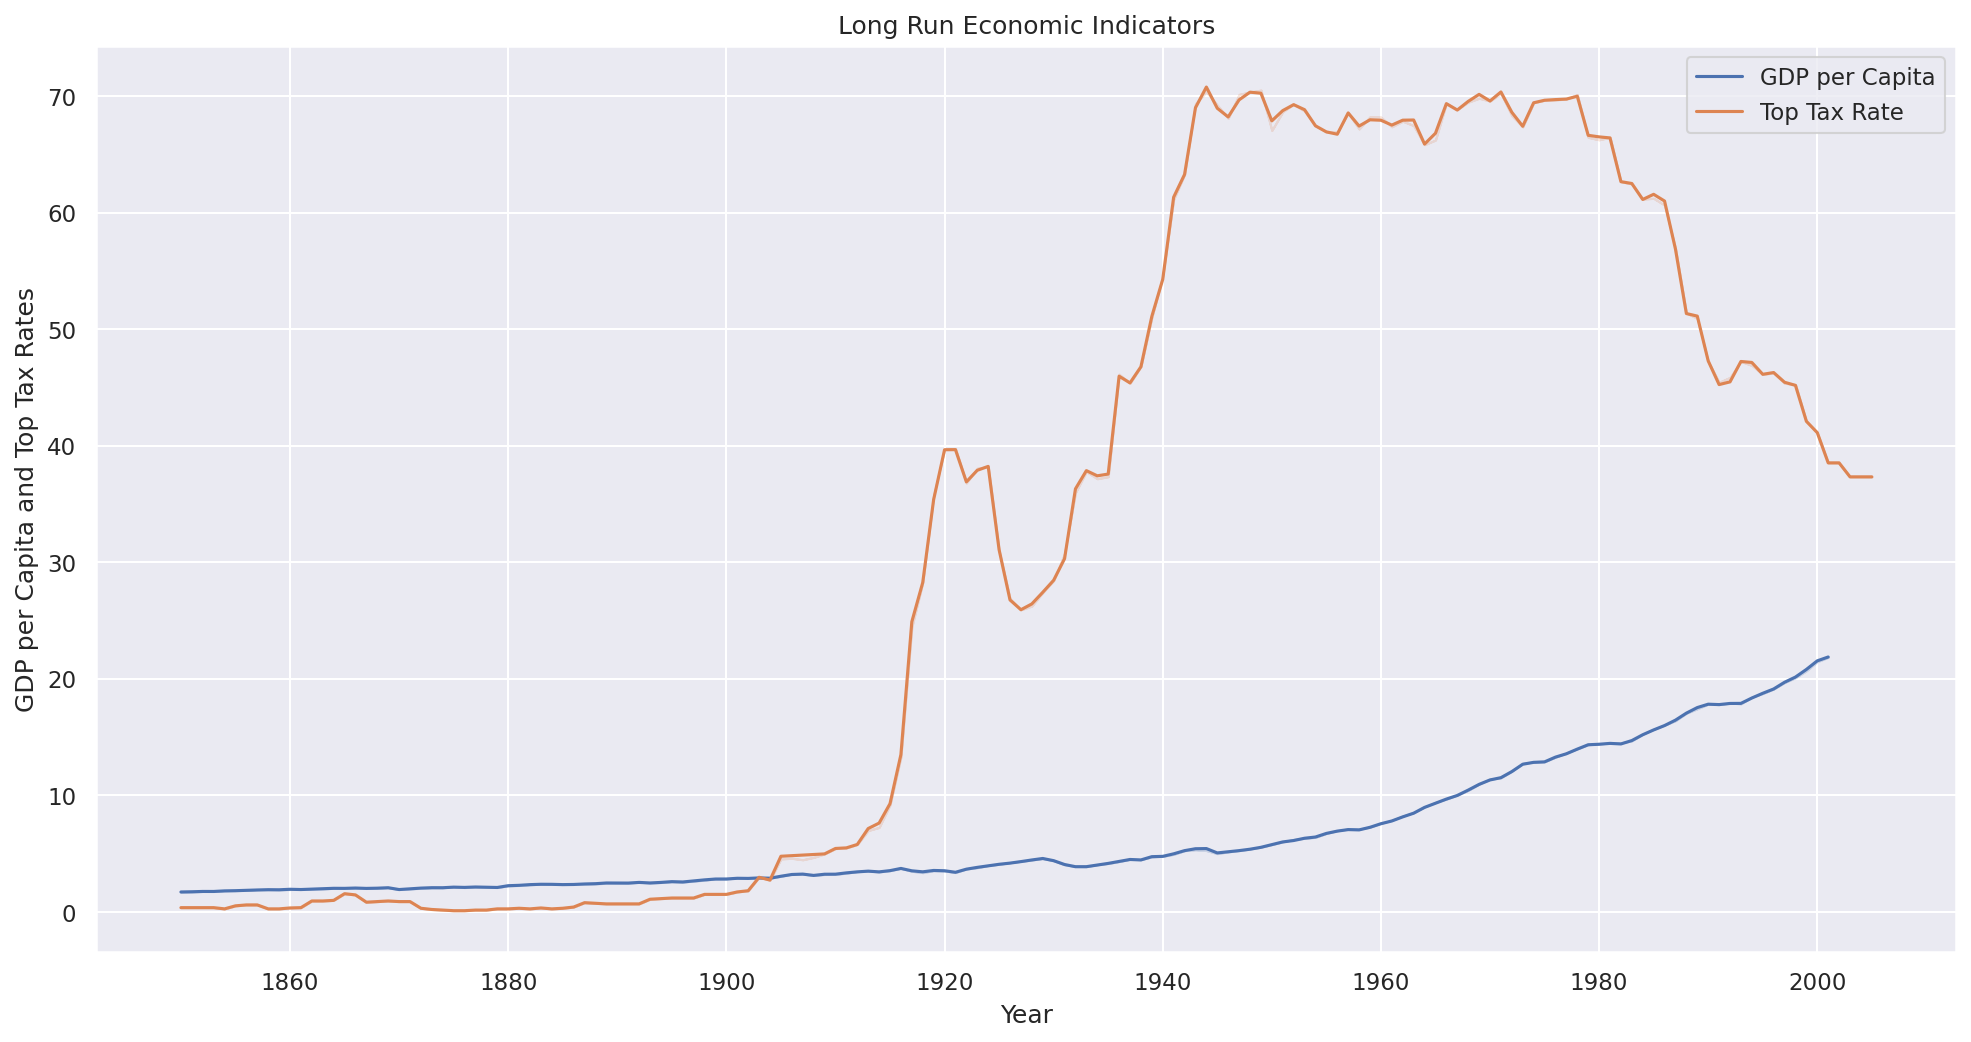

In [18]:
sns.lineplot(x="year",y="gdppcp",data=ss,label="GDP per Capita",ci=False)
sns.lineplot(x="year",y="topratep",data=ss, label="Top Tax Rate", ci=False)
plt.xlabel("Year")
plt.ylabel("GDP per Capita and Top Tax Rates")
plt.title("Long Run Economic Indicators")

**Question 2.3. We are now ready to replicate figure 1 from the paper. To do this, you should use `sns.lineplot` twice, with `year` as the x axis and `topratep` as the y axis, first for the participants and second for the non-participants. The important thing is to get the lines right, but you should label the axes and the plot in an informative way as well.**

**Question 2.4 [Optional]. Make a graph which has a separate line for the top tax rate of each of the four participants over this time period, in addition to the average of nonparticipants.**

## Part 3: Regressions

Now let's replicate some columns from Table 1 of the paper. Each column corresponds to a multivariate regression with `topratep` as the dependent variable, on the sample of all 8 countries from 1900 to 1930. Let's make a data frame with the appropriate observations.

In [21]:
all_close = ss[(ss['year'] >= 1900) & (ss['year']<= 1930)]

The regression in the first column includes `wwihighmobaft` as the key independent variable, as well as (1) a linear time trend, and (2) country fixed effects. To capture (1), we can add `year` as an independent variable, since it is a number and so the coefficient will give us a linear prediction about how the prediction about the top tax rate changes as each year passes (keeping other variables fixed. To capture (2) we can also add `country` like we would as another independent variable, since by default `smf.ols` will convert string variables into a set of separate dummy variables for the different possible values it can take on.

**Question 3.1. Use `smf.ols` to replicate the regression in column 1 of table 1. Make sure the coefficient on `wwihighmobaft` matches what is in the table in the paper. (Side note: the standard errors will be different for reasons we aren't covering in class)**

Columns 2 and 3 add some control variables. To help translate the table from the paper to the variable names:
- "GDP PER CAPITA" is `gdppcp`
- "LEFT SEAT SHARE is `leftseatshp`
- "MALE UNIVERSAL SUFFRAGE" is `munsuff`
- "REVENUE TO GDP" is `ratiop`

To avoid being repetitive, let's skip straight to the *third* column.

**Question 3.2. Use `smf.ols` to replicate the third column of Table 1.**

To replicate column 4, we need to add *year fixed effects*. I.e., rather than including year as a single independent variable (assuming the effect of going up one year is the same every year), we want to create separate dummy variables for each year of the data. One way to do this is to first create a "string version" of the year.

In [22]:
all_close['year_s'] = all_close['year'].apply(str)

/tmp/ipykernel_24/1457660585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_close['year_s'] = all_close['year'].apply(str)


,country,ccode,year,enfranchised1,enfranchised2,enfrachisement3,inctaxshrn,hifatwaryear,wwi_iihighmob2,decadec,munsuff,topratep,himobpopyearp,himobpopyear2p,leftseatshp,gdppcp,ratiop,topratepl1,wwihighmobaft,year3,topdum,topratenoint,topratenointl1,_Idecadec_9,_Idecadec_10,_Idecadec_11,_Idecadec_12,_Idecadec_13,_Idecadec_14,_Idecadec_15,_Idecadec_16,_Idecadec_17,_Idecadec_18,_Idecadec_19,_Idecadec_20,_Idecadec_21,_Idecadec_22,_Idecadec_23,_Iccode_20,_Iccode_200,_Iccode_210,_Iccode_220,_Iccode_230,_Iccode_380,_Iccode_740,year_s
50,USA,2,1900,NaN,47.400002,NaN,0.000000,0,0,13,0,0.0,0.0,0.0,0.0,4.106750,0.030321,0.0,0,1900.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1900
51,USA,2,1901,NaN,47.400002,NaN,0.000000,0,0,13,0,0.0,0.0,0.0,0.0,4.481349,0.028406,0.0,0,1901.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1901
52,USA,2,1902,NaN,47.400002,NaN,0.000000,0,0,13,0,0.0,0.0,0.0,0.0,4.437717,0.026019,0.0,0,1902.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1902
53,USA,2,1903,NaN,47.400002,NaN,0.000000,0,0,13,0,0.0,0.0,0.0,0.0,4.568620,0.024541,0.0,0,1903.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1903
54,USA,2,1904,NaN,46.799999,NaN,0.000000,0,0,13,0,0.0,0.0,0.0,0.0,4.426649,0.023624,0.0,0,1904.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,Japan,740,1926,NaN,NaN,NaN,19.879999,0,0,15,1,36.0,0.0,0.0,0.0,1.863848,0.267668,36.0,0,1926.0,1.0,36.0,36.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1926
1169,Japan,740,1927,NaN,NaN,NaN,20.059999,0,0,15,1,36.0,0.0,0.0,0.0,1.862826,0.278770,36.0,0,1927.0,1.0,36.0,36.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1927
1170,Japan,740,1928,NaN,NaN,NaN,18.910000,0,0,15,1,36.0,0.0,0.0,0.0,1.984919,0.270871,36.0,0,1928.0,1.0,36.0,36.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1928
1171,Japan,740,1929,NaN,NaN,NaN,18.650000,0,0,15,1,36.0,0.0,0.0,0.0,2.018815,0.279811,36.0,0,1929.0,1.0,36.0,36.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1929


Now when we include `year_s` as an independent variable, `smf.ols` will create a separate dummy variable for each possible year. 

**Question 3.3. Use `smf.ols` to replicate column 4 of Table 1.**

The previous analysis just makes a broad comparison between the time before and after WWI for participants (compared to nonparticipants).

Table 2 takes a more fine-grained approach, asking if the top tax rate goes up in individual years of high war mobilization. This analysis is done on a wider time window, from 1850 to 1970.


In [73]:
all_long = ss[(ss['year'] >= 1850) & (ss['year'] <= 1970)]
all_long

,country,ccode,year,enfranchised1,enfranchised2,enfrachisement3,inctaxshrn,hifatwaryear,wwi_iihighmob2,decadec,munsuff,topratep,himobpopyearp,himobpopyear2p,leftseatshp,gdppcp,ratiop,topratepl1,wwihighmobaft,year3,topdum,topratenoint,topratenointl1,_Idecadec_9,_Idecadec_10,_Idecadec_11,_Idecadec_12,_Idecadec_13,_Idecadec_14,_Idecadec_15,_Idecadec_16,_Idecadec_17,_Idecadec_18,_Idecadec_19,_Idecadec_20,_Idecadec_21,_Idecadec_22,_Idecadec_23,_Iccode_20,_Iccode_200,_Iccode_210,_Iccode_220,_Iccode_230,_Iccode_380,_Iccode_740
0,USA,2,1850,NaN,44.200001,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.830661,0.017015,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,USA,2,1851,NaN,44.200001,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.867650,0.019820,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,USA,2,1852,NaN,44.900002,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.904639,0.017458,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,USA,2,1853,NaN,44.900002,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.941628,0.018436,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,USA,2,1854,NaN,44.900002,NaN,NaN,0,0,8,0,0.0,0.0,0.0,0.0,1.978617,0.020414,0.0,0,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Japan,740,1966,NaN,NaN,NaN,NaN,0,0,19,1,75.0,0.0,0.0,28.6,6.567349,0.329843,75.0,0,NaN,1.0,75.0,75.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1209,Japan,740,1967,NaN,NaN,NaN,NaN,0,0,19,1,75.0,0.0,0.0,27.9,7.220056,0.324385,75.0,0,NaN,1.0,75.0,75.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1210,Japan,740,1968,NaN,NaN,NaN,NaN,0,0,19,1,75.0,0.0,0.0,27.9,8.058370,0.316981,75.0,0,NaN,1.0,75.0,75.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1211,Japan,740,1969,NaN,NaN,NaN,NaN,0,0,19,1,75.0,0.0,0.0,21.4,8.956808,0.313505,75.0,0,NaN,1.0,75.0,75.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


Let's look at how many countries had 2% of the population mobilized for a war effort over the time window. The `himobpopyear2p` variable is equal to 1 when this is true or 0 otherwise, so the yearly average tells us the proportion of countries highly mobilized. (There are some quirks here but the lineplot gives a sense of the general trend.)

<AxesSubplot:xlabel='year', ylabel='himobpopyear2p'>

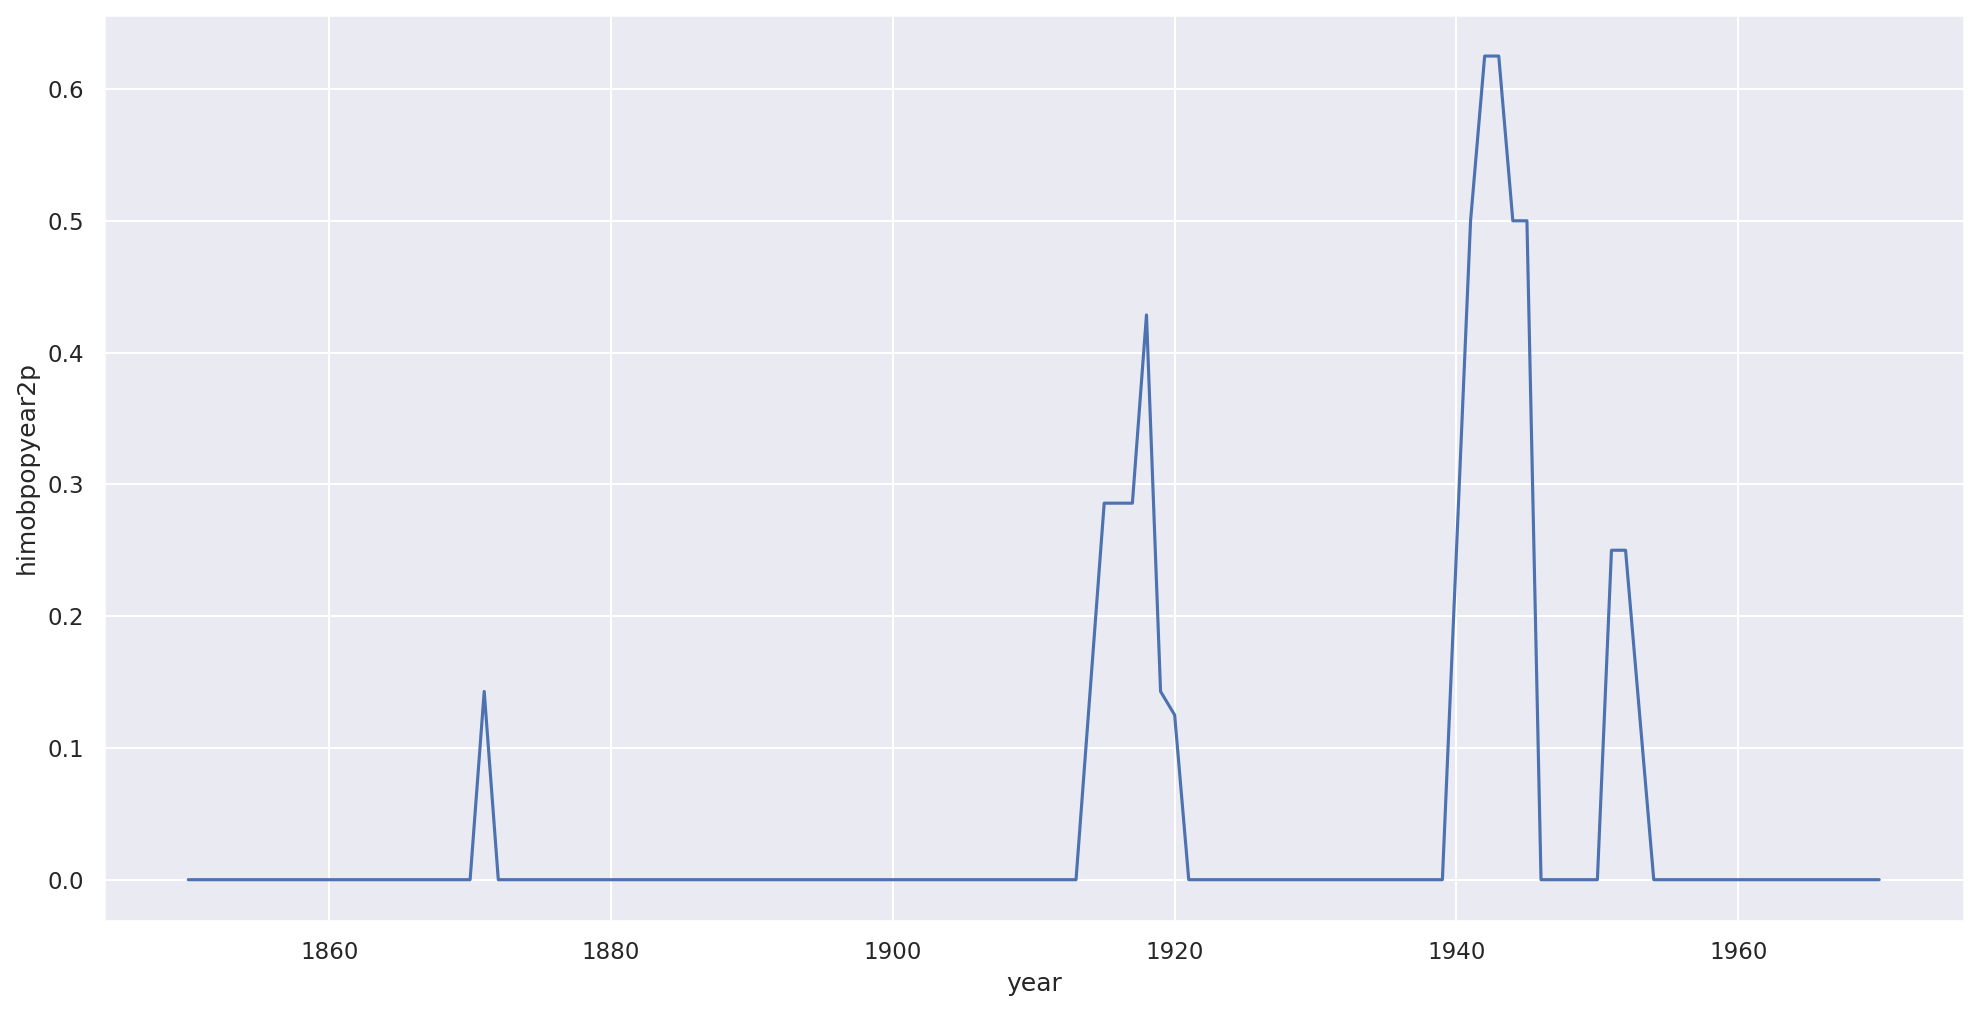

In [84]:
sns.lineplot(x='year', y='himobpopyear2p', data=all_long, ci=None)

Not surprising, we see the biggest spikes around WWI and WWII.

To measure changes in the top tax rate, we include the prior year tax rate `topratepl1`. So, the coefficient on `himobpopyear2p` tells us "keeping fixed the previous year top tax rate, how does having high moblization increase our prediction for the current year top tax rate." That is, how much of an increase over last years top tax rate do we expect with mobilation?

**Question 3.4. Replicate the regression in column 1 of Table 3. Remember to include `year` and `country` as independent variables to capture the linear time trend and country fixed effects.**

**Question 3.5 [Optional] Replicate the remaining columns of table 3. Hint: to get the decade fixed effects, create a strong version of the `decadec` variable.**

## Part 4: Wrapping up
.
**Question 4.1. Run a regression with a different specification than those in the paper. For example, you could add some different control variables, use a different time window, or exclude one or more countries. Explain why you chose this alternative, and interpret the results.**

**Question 4.2. If you had the time/ability to collect additional data to extend this analysis, what would you do? What would you expect to find?**